<a href="https://colab.research.google.com/github/Neermita18/QuantumChem/blob/main/BasicsOfQuantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install qiskit[visulization]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.2 MB/s eta 0:00:00


In [10]:
import qiskit as qs
from math import *
import numpy as np
import pandas as pd
from qiskit import *
from qiskit.visualization import *

In [4]:
qs

<module 'qiskit' from '/usr/local/lib/python3.10/dist-packages/qiskit/__init__.py'>

### Qubits

In [11]:
a= sqrt(1/2)
b= sqrt(1/2)


In [12]:
bits= {"|0\u27E9": np.array([1,0]), "|1\u27E9": np.array([0,1]), "a|0\u27E9+b|1\u27E9": np.array([a,b])}
bits

{'|0⟩': array([1, 0]),
 '|1⟩': array([0, 1]),
 'a|0⟩+b|1⟩': array([0.70710678, 0.70710678])}

In [13]:
probs={}
for b in bits:
  print(f"For {b}")
  for x in range(len(bits[b])):
    probs[b]=pow(bits[b][x],2)
    print(f"Probability of {x} is: {probs[b]*100}%")

For |0⟩
Probability of 0 is: 100.0%
Probability of 1 is: 0.0%
For |1⟩
Probability of 0 is: 0.0%
Probability of 1 is: 100.0%
For a|0⟩+b|1⟩
Probability of 0 is: 50.000000000000014%
Probability of 1 is: 50.000000000000014%


### Bloch Sphere Representation

In [16]:
angles={}
angles["theta"]=float(input("Enter theta value: "))
angles["phi"]=float(input("Enter phi value: "))


Enter theta value: 3.14
Enter phi value: 0


In [17]:
new_bits={"|0\u27E9": {"theta":0, "phi":0}, "|1\u27E9": {"theta":pi, "phi":0}, "|a\u27E9+b\u27E9": angles}
for x in new_bits:
  print(f"For {x}")
  print(f"Theta: {new_bits[x]['theta']}")
  print(f"Phi: {new_bits[x]['phi']}")

For |0⟩
Theta: 0
Phi: 0
For |1⟩
Theta: 3.141592653589793
Phi: 0
For |a⟩+b⟩
Theta: 3.14
Phi: 0.0


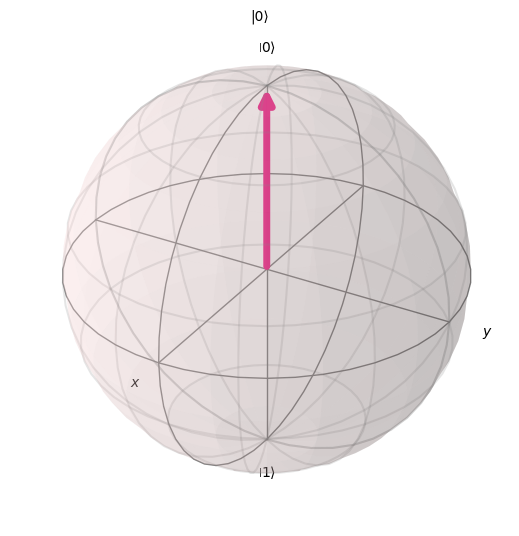

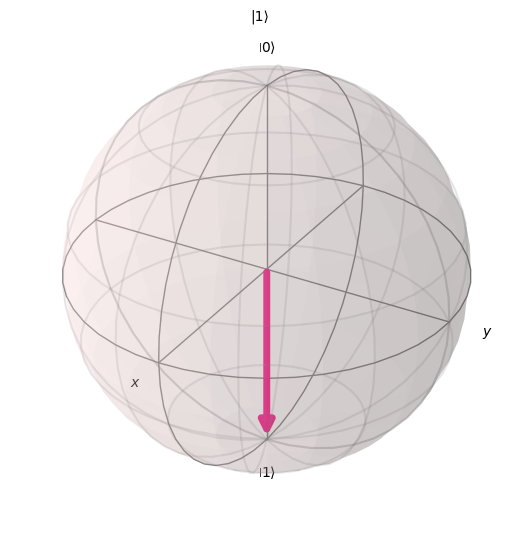

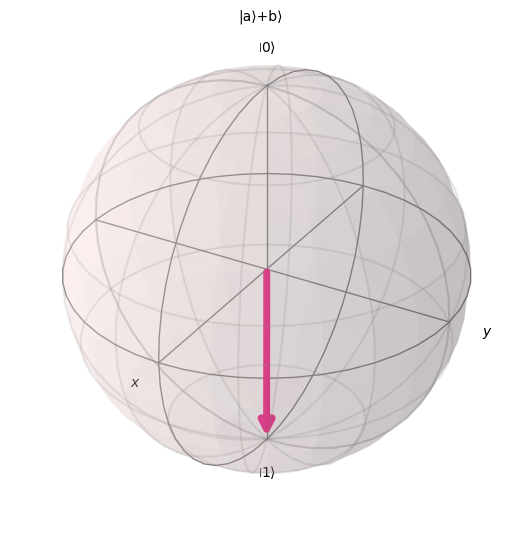

In [23]:
for state, params in new_bits.items():
    bloch = [
        cos(params["phi"]) * sin(params["theta"]),
        sin(params["phi"]) * sin(params["theta"]),
        cos(params["theta"])]
    display(plot_bloch_vector(bloch, title=state))

In [19]:
print(type(new_bits))
print(new_bits)

<class 'dict'>
{'|0⟩': {'theta': 0, 'phi': 0}, '|1⟩': {'theta': 3.141592653589793, 'phi': 0}, '|a⟩+b⟩': {'theta': 3.14, 'phi': 0.0}}


In [25]:
from qiskit import *
import qiskit.quantum_info as qi
qc = QuantumCircuit(2)
qc.h(1)
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [28]:
qc = QuantumCircuit(2)
qc.h(0)  # Apply Hadamard gate
qc.cx(0, 1)  # Apply CNOT gate
qc.measure_all()  # Measure both qubits
print(qc.draw())


        ┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
